<span style="float:left;">Licence CC BY-SA</span><span style="float:right;">Fabrice Zaoui&nbsp;</span><br/>
___

This tutorial is intended for people who want to run Telemac 2D in an interactive mode with the help of the Python programming language. The interactive mode means that communication with Telemac becomes possible throughout the simulation without having to stop it. One can easily set or get the value of any variables at each time step with the help of special communication functions: the [Application Programming Interfaces](https://en.wikipedia.org/wiki/Application_programming_interface) (API).

By using the APIs, research and engineering with Telemac is encouraged in every fields where communication is crucial: optimization, code coupling, control system, sensitivity analysis and so on.

# Telemac 2D as a Python module

## Building the interface

When using Telemac in a classic way (i.e. without API), you first have to compile all the Fortran sources of Telemac with (for example) the following command:

In [1]:
%%bash
compile_telemac.py



Loading Options and Configurations
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  _                        _    
 | |                      | |   
 | |_  _ __  _   _  _ __  | | __
 | __|| '__|| | | || '_ \ | |/ /
 | |_ | |   | |_| || | | ||   < 
  \__||_|    \__,_||_| |_||_|\_\
                                
                                


   _____   ___              __               _                       
  / ____| / _ \            / _|             | |                      
 | (___  | (_) |     __ _ | |_   ___   _ __ | |_  _ __   __ _  _ __  
  \___ \  \__, |    / _` ||  _| / _ \ | '__|| __|| '__| / _` || '_ \ 
  ____) |   / /  _ | (_| || |  | (_) || |   | |_ | |   | (_| || | | |
 |_____/   /_/  (_) \__, ||_|   \___/ |_|    \__||_|    \__,_||_| |_|
                     __/ |                                           
                    |___/                                            
Scanning the source code for:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

*Note: if an error occurs, check for the environment variables HOMETEL and SYSTELCFG before running the previous command.*

If the compilation is successful, you will then run Telemac on your test case providing a steering file:

In [2]:
%%bash
telemac2d.py -h



Loading Options and Configurations
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

usage: telemac2d.py [-h] [-c config name] [-f config file] [-r TELEMAC root]
                    [-s] [-t] [-w W_DIR] [--nozip] [--jobname JOBNAME]
                    [--queue HPC_QUEUE] [--walltime WALLTIME] [--email EMAIL]
                    [--hosts HOSTS] [--ncsize NCSIZE] [--nctile NCTILE]
                    [--ncnode NCNODE] [--sequential] [--mpi]
                    [--split | --run | -x | --merge] [--use-link]
                    cas files) [cas file(s ...]

telemac2d.py is one of the execution launcher for the TELEMAC system.
            

positional arguments:
  cas file(s)

optional arguments:
  -h, --help            show this help message and exit
  -c config name, --configname config name
                        specify configuration name, default is randomly found
                        in the configuration file
  -f config file, --configfile config file
    

*Note: as the name of the steering file here is fictive, no computation is done*

The previous command requires all the static librairies to be linked with the Fortran user file in an executable. When using the API with Python, it is the dynamic libraries of the Telemac system that are used.

The interface between the Telemac libraries and the Python language is automatically created using [f2py](http://docs.scipy.org/doc/numpy-dev/f2py/). This corresponds to the compilation of the Telemac API for Python. It has to be done by adding :
options: api
in the configuration file (systel.cfg)

## Using the interface

Telemac/Python is now ready to be used as a hydrodynamic 2D solver with the import system:

In [3]:
import telapy.api.t2d

The module 'TelApy.api.t2d' is located in the '$HOMETEL/scripts/python27/TelApy/api' directory. If an error occurs while attempting to import, check the value of the environment variable PYTHONPATH. Alternatively you can also work with the file 'apiT2d.py' listed in your working directory.


In [4]:
%%bash
echo $PYTHONPATH

/home/B61570/opentelemac/git/trunk/builds/S9.gfortran/wrap_api/lib:/home/B61570/opentelemac/git/trunk/scripts/python3:/home/B61570/opentelemac/git/trunk/builds/S9.gfortran/wrap_api/lib:/home/B61570/opentelemac/git/trunk/scripts/python3:


The module 'TelApy.api.t2d' defines a class named 'Telemac2d'. The user will have to instantiate an object from this class in order to run Telemac with all the facilities offered by the API.

In [5]:
# Changing of directory : 'examples' directory of the Telemac sources
import os
HOMETEL = os.environ.get('HOMETEL')
os.chdir(HOMETEL + '/examples/telemac2d/breach')

# Instantiation of a Telemac2d object from the test case named 'breach'
# - steering file : 't2d_breach.cas'
# - language : french (1) or english (2: default)
from telapy.api.t2d import Telemac2d
from mpi4py import MPI
my_case = Telemac2d('t2d_breach.cas', lang=1, comm=MPI.COMM_WORLD)
my_case

An object 'my_case' is now created. This object offers some useful methods to communicate with the Telemac computational kernel. These (non exaustive) methods are seen with:

In [6]:
dir(my_case)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_error',
 '_initstate',
 '_instanciated',
 '_knolg',
 '_nachb',
 '_set_parallel_array',
 '_variables',
 'api_get_boolean',
 'api_get_double',
 'api_get_double_array',
 'api_get_integer',
 'api_get_integer_array',
 'api_get_string',
 'api_handle_error',
 'api_inter',
 'api_set_boolean',
 'api_set_double',
 'api_set_double_array',
 'api_set_integer',
 'api_set_integer_array',
 'api_set_string',
 'bottom',
 'cas',
 'casfile',
 'code',
 'comm',
 'concatenation_step',
 'coordx',
 'coordy',
 'depth',
 'dicofile',
 'dump_var_info',
 'error',
 'fcomm',
 'finalize',
 'g2l',
 'generate_var_info',
 'get',
 'get_array',
 'get_elem',


# API description

The methods listed above give access to the Fortran Telemac API and to some extra functionalities based on Python packages like 'numpy' or 'matplotlib'. The list is still uncomplete and will be improved in future.

### Get the value of a Telemac variable

In [7]:
help(my_case.get)

Help on method get in module telapy.api.api_module:

get(varname, i=-1, j=-1, k=-1, global_num=True) method of telapy.api.t2d.Telemac2d instance
    Get the value of a variable of Telemac 2D
    
    @param varname Name of the variable
    @param i index on first dimension
    @param j index on second dimension
    @param k index on third dimension
    @param global_num Are the index on local/global numbering
    
    @retuns variable value



### Get a node number

In [8]:
help(my_case.get_node)

Help on method get_node in module telapy.api.api_module:

get_node(xval, yval) method of telapy.api.t2d.Telemac2d instance
    Get the nearest node number for the coordinates (xval, yval).
    
    @param xval X coordinate.
    @param yval Y coordinate.
    
    @returns An integer value from 0 to (nbnode-1).



### Get an element number

In [9]:
help(my_case.get_elem)

Help on method get_elem in module telapy.api.api_module:

get_elem(xval, yval) method of telapy.api.t2d.Telemac2d instance
    Get the triangle where the point (xval, yval) is
    
    @param xval X coordinate
    @param yval Y coordinate
    
    @return integer value from 0 to (nbtriangle-1)
             (-1 if no triangle found)



### Error message from Telemac

In [10]:
help(my_case.get_error_message)

Help on method get_error_message in module telapy.api.api_module:

get_error_message() method of telapy.api.t2d.Telemac2d instance
    Get the error message from the Fortran sources of Telemac 2D
    
    @retuns character string of the error message



### Mesh coordinates and connectivity

In [11]:
help(my_case.get_mesh)

Help on method get_mesh in module telapy.api.api_module:

get_mesh() method of telapy.api.t2d.Telemac2d instance
    Get the 2D mesh of triangular cells
    
    @returns X, Y coordinates and connectivity



### Hydraulic state

In [12]:
help(my_case.get_state)

Help on method get_state in module telapy.api.t2d:

get_state() method of telapy.api.t2d.Telemac2d instance
    Get the hydraulic state
    
    @retuns the hydraulic state: depth (m) .. u_vel (m/s) .. v_vel (m/s)



In [13]:
help(my_case.set_state)

Help on method set_state in module telapy.api.t2d:

set_state(hval, uval, vval) method of telapy.api.t2d.Telemac2d instance
    Set the hydraulic state: hval (m) .. uval (m/s) .. vval (m/s)
    
    @param hval Water depth value
    @param uval Velocity U value
    @param vval Velocity V value



### Read the steering file

In [14]:
help(my_case.set_case)

Help on method set_case in module telapy.api.api_module:

set_case(init=True) method of telapy.api.t2d.Telemac2d instance
    Read the steering file
    
    @param init (boolean) If true calling p_init



### State initialisation

In [15]:
help(my_case.init_state_default)

Help on method init_state_default in module telapy.api.api_module:

init_state_default() method of telapy.api.t2d.Telemac2d instance
    Initialize the state of the model Telemac 2D with the values of
    disharges and water levels as indicated by the steering file



### Save a state

In [16]:
help(my_case.save_state)

Help on method save_state in module telapy.api.t2d:

save_state() method of telapy.api.t2d.Telemac2d instance
    Save the hydraulic state



### Back to a saved state

In [17]:
help(my_case.restore_state)

Help on method restore_state in module telapy.api.t2d:

restore_state() method of telapy.api.t2d.Telemac2d instance
    Restore the hydraulic state



### Run Telemac for one time step

In [18]:
help(my_case.run_one_time_step)

Help on method run_one_time_step in module telapy.api.api_module:

run_one_time_step() method of telapy.api.t2d.Telemac2d instance
    Run one time step



### Run Telemac for all the time steps

In [19]:
help(my_case.run_all_time_steps)

Help on method run_all_time_steps in module telapy.api.api_module:

run_all_time_steps() method of telapy.api.t2d.Telemac2d instance
    Run all the time steps
    
    @retuns the number of computed time steps



### Change the value of a Telemac variable

In [20]:
help(my_case.set)

Help on method set in module telapy.api.api_module:

set(varname, value, i=-1, j=-1, k=-1, global_num=True) method of telapy.api.t2d.Telemac2d instance
    Set the value of a variable of the telemac-mascare module
    
    @param varname (str) Name of the variable
    @param value (int/bool/str/double) the value to set
    @param i (int) index on first dimension
    @param j (int) index on second dimension
    @param k (int) index on third dimension
    @param global_num (bool) Are the index on local/global numbering
    
    @retuns variable value



### Plotting the mesh

In [21]:
help(my_case.show_mesh)

Help on method show_mesh in module telapy.api.api_module:

show_mesh(show=True, visu2d=True) method of telapy.api.t2d.Telemac2d instance
    Show the 2D mesh with topography
    
    @param show Display the graph (Default True)
    @param visu2d 2d display (Default True)
    
    @retuns the figure object



### Plotting the state

In [22]:
help(my_case.show_state)

Help on method show_state in module telapy.api.t2d:

show_state(show=True) method of telapy.api.t2d.Telemac2d instance
    Show the hydraulic state with matplotlib
    
    @param show Display the graph (Default True)
    
    @retuns the figure object



# Telemac Variables

All the variables and parameters available with the API to set or get a value can be seen with:

In [23]:
varnames, varinfo = my_case.list_variables()

In [24]:
for a, b in zip(varnames, varinfo):
    print(a + ': ' + b)

MODEL.AT: CURRENT TIME
MODEL.BCFILE: BOUNDARY CONDITION FILE NAME
MODEL.BND_TIDE: OPTION FOR TIDAL BOUNDARY CONDITIONS
MODEL.BOTTOMELEVATION: LEVEL OF THE BOTTOM
MODEL.CHESTR: STRIKLER ON POINT
MODEL.FAIR: FAIR ON POINT
MODEL.COTE: xxx
MODEL.CPL_PERIOD: COUPLING PERIOD WITH SISYPHE
MODEL.DEBIT: DISCHARGE ON FRONTIER
MODEL.DEBUG: ACTIVATING DEBUG MODE
MODEL.FLUX_BOUNDARIES: FLUX AT BOUNDARIES
MODEL.GEOMETRYFILE: NAME OF THE GEOMERY FILE
MODEL.METEOFILE: NAME OF THE BINARY ATMOSPHERIC FILE
MODEL.FO2FILE: NAME OF THE FORMATTED DATA FILE 2
MODEL.LIQBCFILE: NAME OF THE LIQUID BOUNDARIES FILE
MODEL.GRAPH_PERIOD: GRAPHICAL OUTPUT PERIOD
MODEL.HBOR: BOUNDARY VALUE ON H FOR EACH BOUNDARY POINT
MODEL.IKLE: CONNECTIVITY TABLE BETWEEN ELEMENT AND NODES
MODEL.NACHB: NUMBERS OF PROC CONTAINING A GIVEN POINT
MODEL.KNOLG: GIVES THE INITIAL GLOBAL NUMBER OF A LOCAL POINT
MODEL.INCWATERDEPTH: INCREASE IN THE THE DEPTH OF THE WATER
MODEL.KP1BOR: POINTS FOLLOWING AND PRECEDING A BOUNDARY POINT
MODEL.LIHBO

# Example of use

Knowing now the API and the variables, a Telemac computation on the test example named 'breach' could be:

## Read the steering file and do allocations

In [25]:
my_case.set_case()

0

## Initialisation

In [26]:
my_case.init_state_default()

## Mesh view

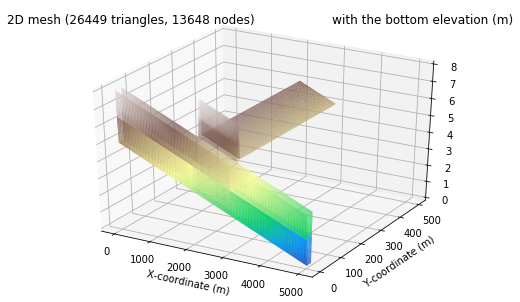

In [27]:
%matplotlib inline
my_figure = my_case.show_mesh(visu2d=False)

## Simulation

In [28]:
for i in range(10):
    my_case.run_one_time_step()

## Current state

### Values

In [29]:
import numpy as np

h, u, v = my_case.get_state()

print('Mean water height (m) = ', h.mean())
print('Max velocity (m/s) = ', np.amax(np.sqrt(u * u + v * v)))

Mean water height (m) =  0.872949260251414
Max velocity (m/s) =  2.559664067853591


### Graph

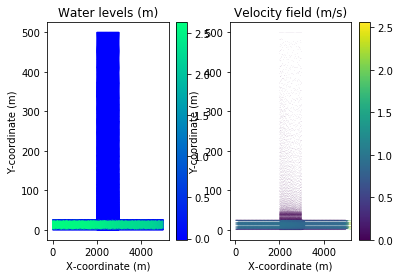

In [30]:
my_new_figure = my_case.show_state(show=True)

### Save

In [31]:
my_case.save_state()
my_case.hsave
my_case.usave
my_case.vsave

array([ 2.77388754e-08,  0.00000000e+00,  2.15638507e-08, ...,
       -1.54989192e-03,  1.43419916e-03,  1.97240494e-03])

### Change

In [32]:
# to null velocity
number_of_nodes = my_case.get('MODEL.NPOIN')
value = np.zeros(number_of_nodes)
my_case.set_array('MODEL.VELOCITYU', value)
my_case.set_array('MODEL.VELOCITYV', value)
   
h, u, v = my_case.get_state()
print('Mean velocity (m/s) = ', np.mean(np.sqrt(u * u + v * v)))

Mean velocity (m/s) =  0.0


### Restore

In [33]:
err = my_case.restore_state()

h, u, v = my_case.get_state()
print('Max velocity (m/s) = ', np.amax(np.sqrt(u * u + v * v)))

Max velocity (m/s) =  2.559664067853591


## Parameters

In [34]:
# bottom elevation at node no. 102
my_case.get('MODEL.BOTTOMELEVATION', 102)

7.179999828338623

In [35]:
# friction coefficient (Strickler value) at node no. 500
my_case.get('MODEL.CHESTR', 500)

15.0

## Deletion

In [36]:
my_case.finalize()
del my_case